In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wine_data.csv to wine_data.csv


#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('wine_data.csv')
#used to read csv files and perform operations on it

df.head()

,customer_seg,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#HANDLING CATEGORICAL DATA

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X1 = LabelEncoder()
x[:,0] = labelencoder_X1.fit_transform(x[:,0])
x[:,1] = labelencoder_X1.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[  0.   118.     1.71 ...   5.64   1.04   3.92]
 [  0.    65.     1.78 ...   4.38   1.05   3.4 ]
 [  0.    63.     2.36 ...   5.68   1.03   3.17]
 ...
 [  2.    68.     4.28 ...  10.2    0.59   1.56]
 [  2.    64.     2.59 ...   9.3    0.6    1.62]
 [  2.   112.     4.1  ...   9.2    0.61   1.6 ]]


#SPLITTING OF DATA INTO TRAINING AND TEST

In [ ]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for model validation.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


#NORMALIZING DATA

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.5        0.128      0.0712831  ... 0.14920273 0.38461538 0.70188679]
 [0.5        0.16       0.22199593 ... 0.05694761 0.46153846 0.37735849]
 [1.         0.504      0.57637475 ... 0.23917995 0.05128205 0.15471698]
 ...
 [0.5        0.36       0.21792261 ... 0.22779043 0.52991453 0.70566038]
 [0.         0.888      0.15071283 ... 0.35307517 0.53846154 0.58490566]
 [0.5        0.28       0.15885947 ... 0.07972665 0.52991453 0.51320755]]
[[ 0.          0.472       0.18533605  0.79333333  0.3814433   0.23809524
   0.49090909  0.56647399  0.30188679  0.32492114  0.26765376  0.4957265
   0.46792453]
 [ 0.          0.72        0.22199593  0.66666667  0.34020619  0.30952381
   0.48        0.6416185   0.54716981  0.49211356  0.22095672  0.58974359
   0.60377358]
 [ 1.          0.576       0.50916497  0.68        0.56185567  0.16666667
   0.30181818  0.08381503  0.60377358  0.26498423  0.74259681  0.00854701
   0.13207547]
 [ 0.          0.84        0.23421589  0.82        0.22680412  0.273

#GRAPHS

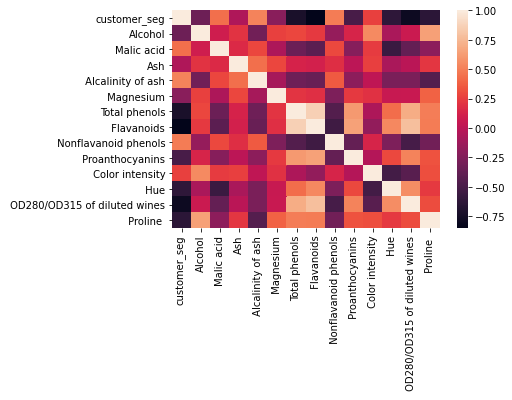

In [ ]:
sns.heatmap(df.corr())

#ALGORITHM

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

#FITTING OF TRAINING DATA

In [ ]:
knn.fit(x_train,y_train)
#training or fitting the train data into the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [ ]:
predictions = knn.predict(x_test)

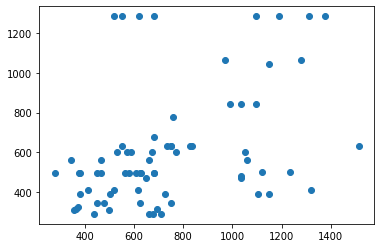

In [ ]:
plt.scatter(y_test,predictions)


#EVALUATION

In [ ]:
from sklearn import metrics
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1
print(metrics.accuracy_score(y_test_classes, y_pred_classes))

1.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [ ]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(knn) 

# Load the pickled model 
lm_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
lm_from_pickle.predict(x_test) 


array([ 392,  845,  472, 1285,  600,  312,  630,  410,  495,  290,  630,
        290,  675,  472,  780, 1285,  495, 1285,  495,  495,  315, 1285,
        600,  630, 1065,  560,  495,  495,  410,  495,  345,  325,  345,
        845,  630, 1285,  600,  345,  290,  392,  495,  392,  500,  392,
        600,  562,  495,  600,  630,  562,  500,  495,  495, 1285,  495,
        312,  290, 1065,  315,  560, 1045,  392,  630,  845, 1285,  410,
        410, 1285,  345,  630,  600,  480])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
y_train=y_train[0:72]
results =confusion_matrix(y_train, predictions)
print(results)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Precision, Recall, Support, Fscore

In [ ]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_train, predictions, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

results =confusion_matrix(y_test, predictions)
print(results)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Precision, Recall, Support, Fscore

In [ ]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, predictions, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, None)